# Clustering

Curso de Verano 
Profesor: Carlos Meneses

## TOC:
1. [K-Means](#1-k-means)
    1. [Teoria](#11-teoría)
    1. [Ejercicio](#12-ejercicio)
    1. [K-Means con Sklearn](#13-ejemplo-k-means-sklearn)
    1. [Ejercicio](#14-ejercicio)
    1. [Ejercicio](#15-ejercicio)
1. [DBSCAN](#2-dbscan)
    1. [Ejercicio](#21-ejercicio-dbscan)

---

## 1. K-Means

## 1.1 Teoría

A continuación se desarrolla un algoritmo sencillo de Kmeans con ciertas funciones auxiliares

In [42]:
import random
import tqdm
import itertools
import matplotlib.pyplot as plt
import numpy as np

Vector = list[float]

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def vector_sum(vectors: list[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def vector_mean(vectors: list[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def cluster_means(k: int,
                  inputs: list[Vector],
                  assignments: list[int]) -> list[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))
    
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k                      # number of clusters
        self.means = None

    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: list[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]

                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return

                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

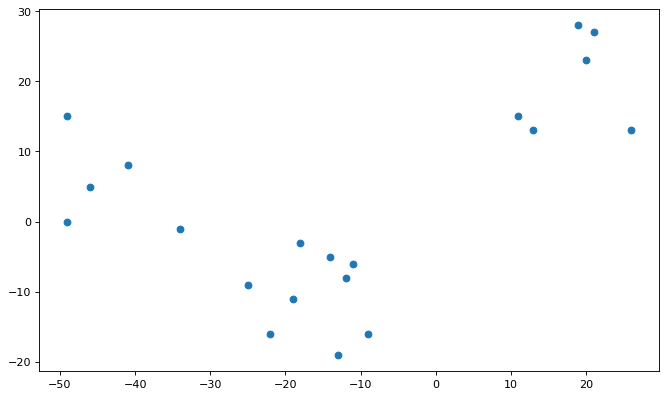

In [7]:
inputs: list[list[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
x: list[float] = [el[0] for el in inputs]
y: list[float] = [el[1] for el in inputs]
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y,  'o')
plt.show()

changed: 1 / 20: : 2it [00:00, 552.17it/s]


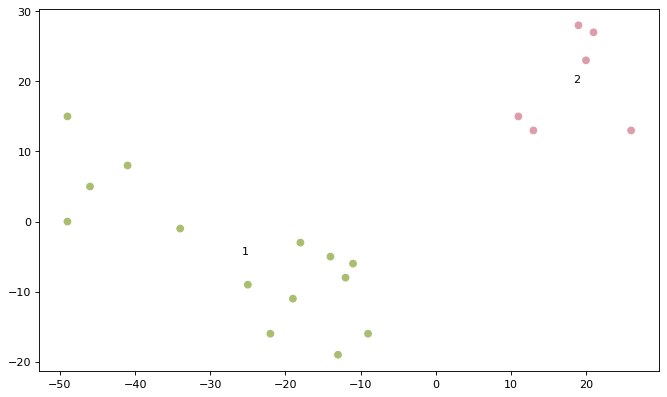

In [8]:
import matplotlib.colors as mcolors

random.seed(12)                   # so you get the same results as me
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means) 

x: list[float] = [el[0] for el in inputs]
y: list[float] = [el[1] for el in inputs]
group: list[int] = [clusterer.classify(el) for el in inputs]
colors = dict(zip(range(0,50),random.sample(list(mcolors.XKCD_COLORS.keys()),20)))

plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x, y, color=[colors[el] for el in group])

for i, el in enumerate(means):
    plt.annotate(f"{i+1}", means[i])

changed: 5 / 20: : 1it [00:00, 495.25it/s]


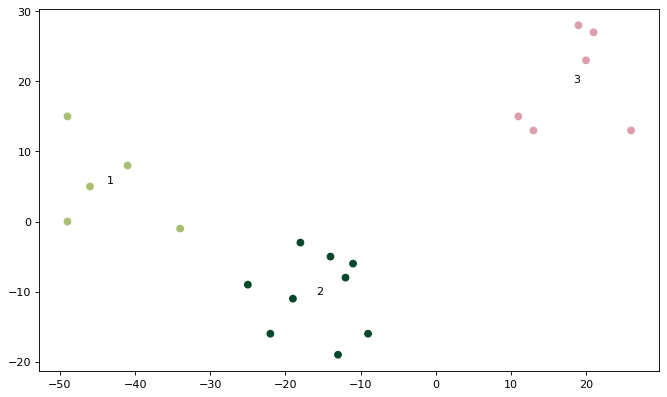

In [9]:
random.seed(12)
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means)

x: list[float] = [el[0] for el in inputs]
y: list[float] = [el[1] for el in inputs]
group: list[int] = [clusterer.classify(el) for el in inputs]


plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x, y, color=[colors[el] for el in group])

for i, el in enumerate(means):
    plt.annotate(f"{i+1}", means[i])

0it [00:00, ?it/s]
changed: 2 / 20: : 2it [00:00, 1063.73it/s]
changed: 1 / 20: : 3it [00:00, 1247.81it/s]
changed: 1 / 20: : 3it [00:00, 988.14it/s]
changed: 3 / 20: : 2it [00:00, 1247.01it/s]
changed: 1 / 20: : 3it [00:00, 1253.78it/s]
changed: 1 / 20: : 3it [00:00, 1390.99it/s]
changed: 1 / 20: : 3it [00:00, 1297.07it/s]
changed: 2 / 20: : 3it [00:00, 1343.47it/s]
changed: 12 / 20: : 1it [00:00, 1042.84it/s]
changed: 1 / 20: : 3it [00:00, 1308.95it/s]
changed: 1 / 20: : 3it [00:00, 1725.10it/s]
changed: 1 / 20: : 4it [00:00, 1743.09it/s]
changed: 3 / 20: : 2it [00:00, 1597.53it/s]
changed: 2 / 20: : 3it [00:00, 1509.83it/s]
changed: 2 / 20: : 3it [00:00, 1035.63it/s]
changed: 1 / 20: : 4it [00:00, 1501.45it/s]
changed: 1 / 20: : 4it [00:00, 1275.45it/s]
changed: 4 / 20: : 3it [00:00, 1387.62it/s]
changed: 1 / 20: : 5it [00:00, 1389.21it/s]


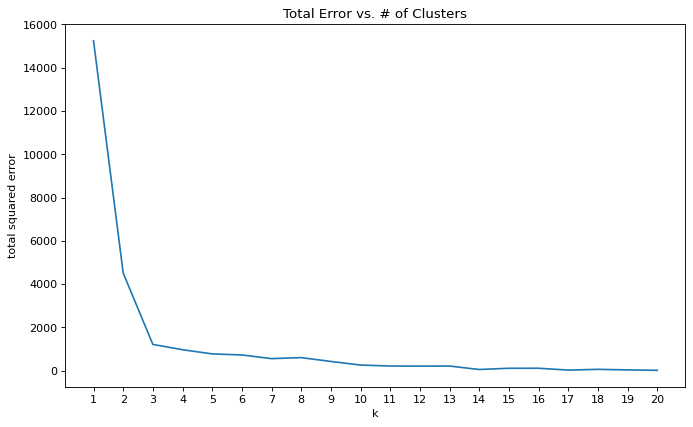

In [10]:
def squared_clustering_errors(inputs: list[Vector], k: int) -> float:
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]

    return sum(squared_distance(input, means[cluster])
                for input, cluster in zip(inputs, assignments))

ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

changed: 2 / 20: : 3it [00:00, 1477.91it/s]
changed: 2 / 20: : 2it [00:00, 1180.00it/s]
changed: 1 / 20: : 4it [00:00, 1101.66it/s]
changed: 4 / 20: : 3it [00:00, 1042.32it/s]


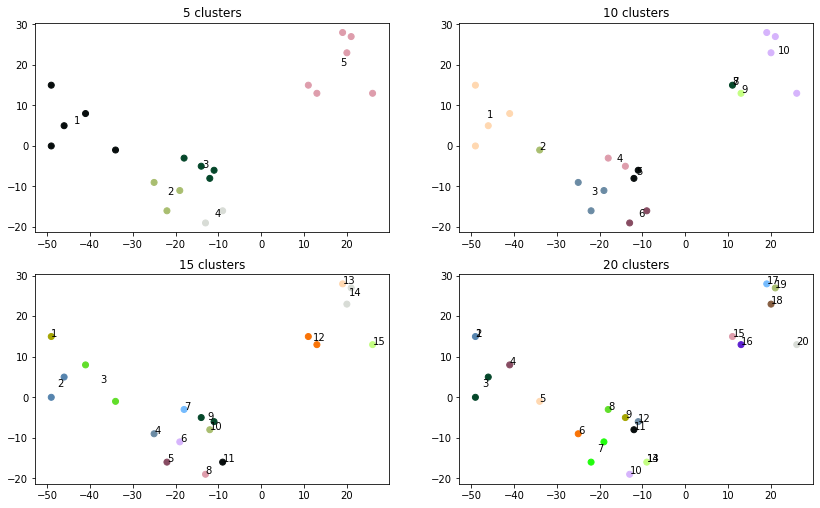

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

K = [5,10,15,20]

for i, _ in enumerate(ax.flatten()):
    clusterer = KMeans(k=K[i])
    clusterer.train(inputs)
    means = sorted(clusterer.means)

    x: list[float] = [el[0] for el in inputs]
    y: list[float] = [el[1] for el in inputs]
    group: list[int] = [clusterer.classify(el) for el in inputs]


    _.scatter(x, y, color=[colors[el] for el in group])
    _.set_title(f"{K[i]} clusters")

    for i, el in enumerate(means):
        _.annotate(f"{i+1}", means[i])
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)


### 1.2 Ejercicio: 
Siguiendo los ejemplos interiores calcular el clustering óptimo para el dataset de iris para dos variables.

Text(0, 0.5, 'Sepal width')

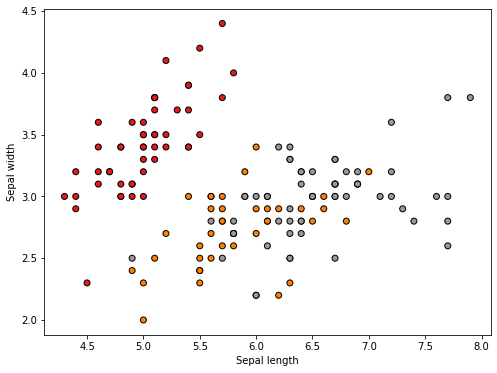

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

0it [00:00, ?it/s]
changed: 1 / 150: : 3it [00:00, 315.93it/s]
changed: 1 / 150: : 4it [00:00, 440.58it/s]
changed: 1 / 150: : 9it [00:00, 496.77it/s]
changed: 1 / 150: : 7it [00:00, 511.54it/s]
changed: 4 / 150: : 5it [00:00, 480.78it/s]
changed: 3 / 150: : 19it [00:00, 541.17it/s]
changed: 1 / 150: : 7it [00:00, 463.45it/s]
changed: 3 / 150: : 12it [00:00, 441.47it/s]
changed: 1 / 150: : 10it [00:00, 398.49it/s]
changed: 2 / 150: : 11it [00:00, 367.21it/s]
changed: 1 / 150: : 8it [00:00, 325.96it/s]
changed: 1 / 150: : 9it [00:00, 325.95it/s]
changed: 3 / 150: : 7it [00:00, 283.08it/s]
changed: 1 / 150: : 9it [00:00, 279.44it/s]
changed: 1 / 150: : 8it [00:00, 263.92it/s]
changed: 2 / 150: : 5it [00:00, 236.83it/s]
changed: 4 / 150: : 5it [00:00, 220.21it/s]
changed: 2 / 150: : 4it [00:00, 198.61it/s]


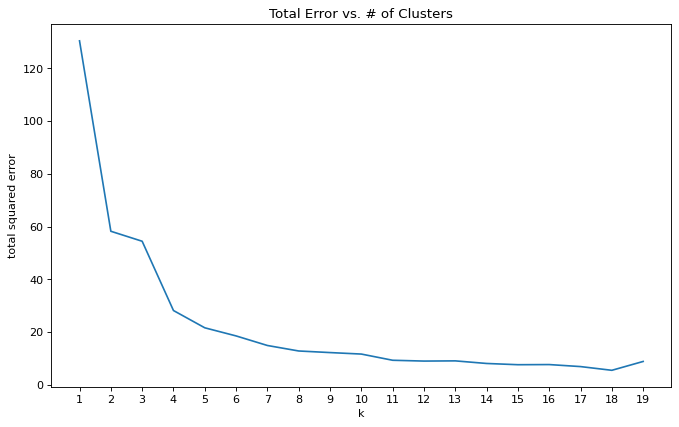

In [22]:
ks = range(1, 20)
errors = [squared_clustering_errors(X, k) for k in ks]

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

changed: 2 / 150: : 9it [00:00, 552.31it/s]
changed: 1 / 150: : 12it [00:00, 683.18it/s]
changed: 1 / 150: : 9it [00:00, 632.52it/s]
changed: 1 / 150: : 13it [00:00, 571.15it/s]


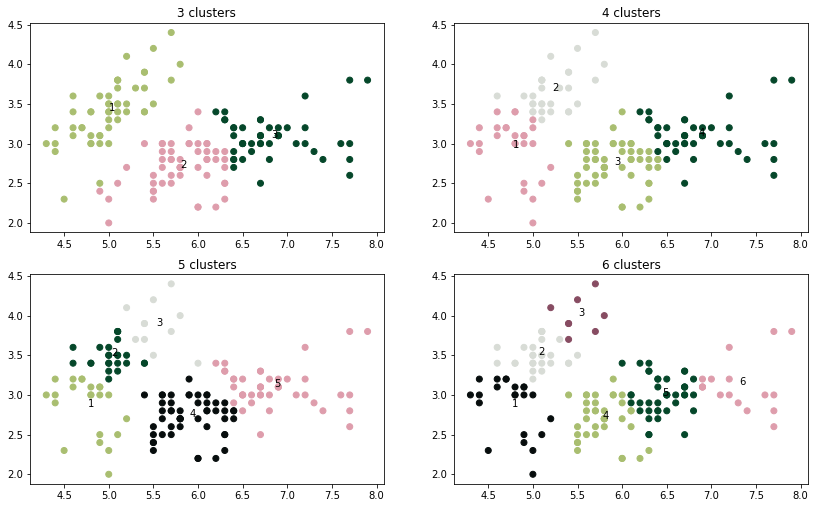

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

K = [3,4,5,6]

for i, _ in enumerate(ax.flatten()):
    clusterer = KMeans(k=K[i])
    clusterer.train(X)
    means = sorted(clusterer.means)

    x0: list[float] = [el[0] for el in X]
    x1: list[float] = [el[1] for el in X]
    group: list[int] = [clusterer.classify(el) for el in X]


    _.scatter(x0, x1, color=[colors[el] for el in group])
    _.set_title(f"{K[i]} clusters")

    for i, el in enumerate(means):
        _.annotate(f"{i+1}", means[i])
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

### 1.3 Ejemplo K-Means Sklearn

In [48]:
# cargamos los módulos más usados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# opción para garantizar que las figuras aparezcan en el notebook
%matplotlib inline

# cargamos el algoritmo K-Means
from sklearn.cluster import KMeans

# cargamos la función para generar nubes de puntos (Gaussianas)
from sklearn.datasets import make_blobs

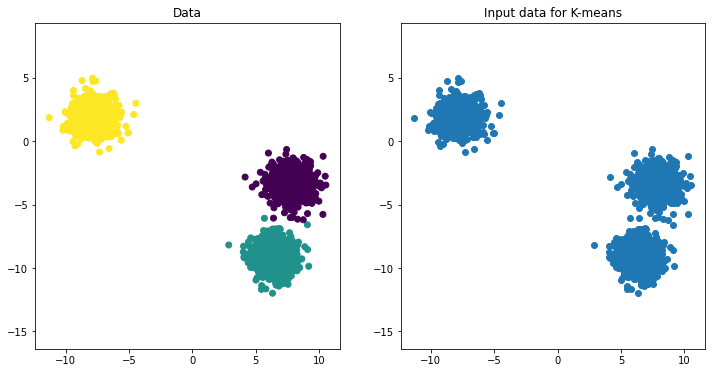

In [49]:
# generamos 1500 puntos del data set "blobs" (3 nubes)

n_samples = 1500
random_state = 6
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# visualizamos los datos
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data")
plt.axis('equal')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data for K-means")
plt.axis('equal')

plt.show()

In [50]:
# usamos K-Means para hallar 3 clusters
y_pred = KMeans(n_clusters=3).fit_predict(X)

### 1.4 Ejercicio.
Visualizar los resultados del ejemplo anterior

Además, probad con 2 y 4 clusters.

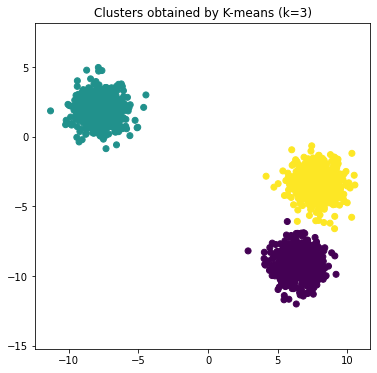

In [51]:
# visualizamos los resultados de K-Means
plt.figure(figsize=(6,6))

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clusters obtained by K-means (k=3)")
plt.axis('equal')

plt.show()

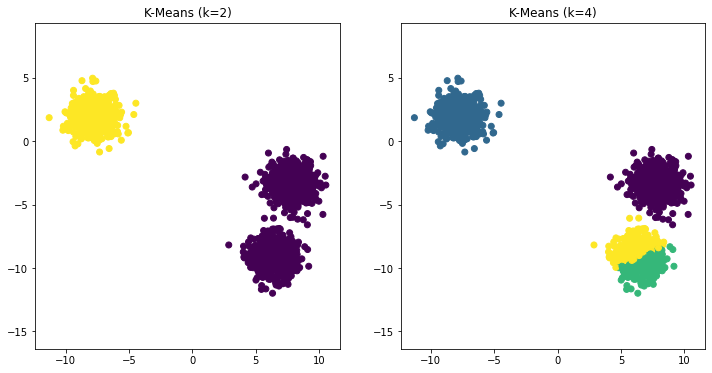

In [52]:
# Escribe tu código aquí:

# usamos K-Means para hallar 2 clusters
y_pred2 = KMeans(n_clusters=2).fit_predict(X)

# usamos K-Means para hallar 4 clusters
y_pred4 = KMeans(n_clusters=4).fit_predict(X)

# visualizamos los resultados de K-Means
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)
plt.title("K-Means (k=2)")
plt.axis('equal')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred4)
plt.title("K-Means (k=4)")
plt.axis('equal')

plt.show()

### 1.5 Ejercicio

Con los datos a continuación halla el número óptimo de clusters y pinta los centros

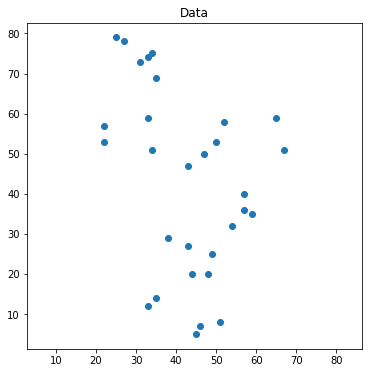

In [53]:
# generamos un conjunto de coordenadas (x1,x2) de puntos
Data = {'x1': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'x2': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

# guardamos los puntos anteriores como filas de un DataFrame
df = pd.DataFrame(Data,columns=['x1','x2'])

# visualizamos estos datos
plt.figure(figsize=(6,6))

plt.scatter(df['x1'], df['x2'])

plt.title("Data")
plt.axis('equal')

plt.show()

Text(0.5, 1.0, 'Elbow curve')

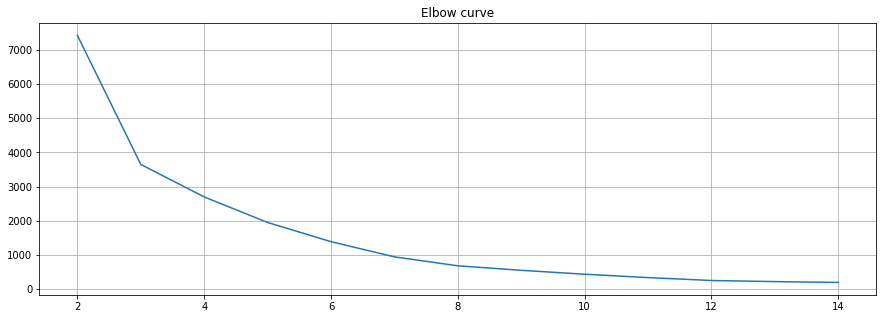

In [54]:
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.title('Elbow curve')

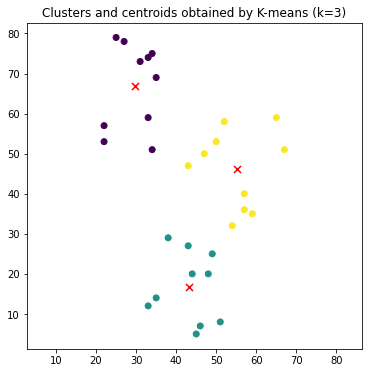

In [55]:
# Escribe tu código aquí:

# usamos K-Means para hallar 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

y_pred = kmeans.predict(df)

# hallamos los centroides encontrados
centroids = kmeans.cluster_centers_

# visualizamos los resultados de K-Means
plt.figure(figsize=(6,6))

plt.scatter(df['x1'], df['x2'], c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=50)

plt.title("Clusters and centroids obtained by K-means (k=3)")
plt.axis('equal')

plt.show()

## 2. DBSCAN

In [56]:
# cargamos el algoritmo DBSCAN
from sklearn.cluster import DBSCAN

### 2.1 Ejercicio DBSCAN

In [57]:
import math

# creamos una función para generar datos en forma de un círculo
def generate_circle_data(r, n=100):
    
    coordinates = [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),
                    math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30))
                   for x in range(1,n+1)]
    return coordinates

In [58]:
np.random.seed(42)

# creamos un data set de 3 círculos concéntricos
df = pd.DataFrame(generate_circle_data(500,1000))
df = pd.concat([df, pd.DataFrame.from_records(generate_circle_data(300,700))])
df = pd.concat([df, pd.DataFrame.from_records(generate_circle_data(100,300))])

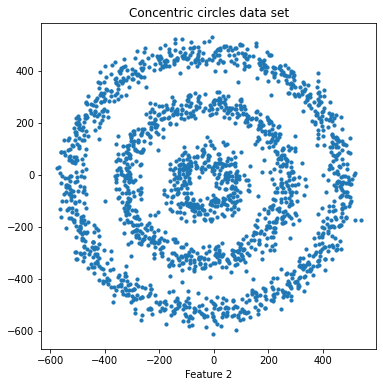

In [59]:
# visualizamos los datos
plt.figure(figsize=(6,6))

plt.scatter(df[0], df[1], s=10)
plt.xlabel('Feature 1')
plt.xlabel('Feature 2')
plt.title('Concentric circles data set')

plt.show()

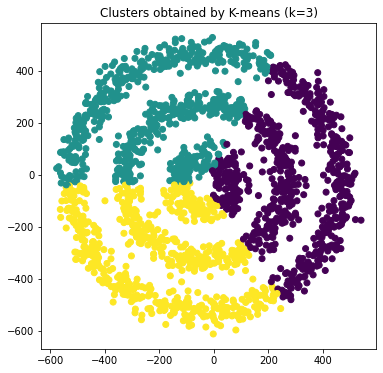

In [60]:
# usamos K-Means para hallar 3 clusters
kmeans = KMeans(n_clusters=3)

kmeans.fit(df)
y_pred = kmeans.predict(df)

# visualizamos los resultados de K-Means
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], c=y_pred)

plt.title("Clusters obtained by K-means (k=3)")

plt.show()

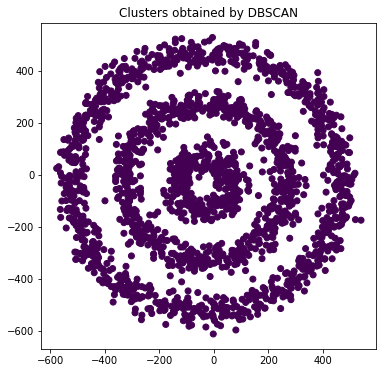

In [61]:
# usamos DBSCAN para encontrar clusters
dbscan = DBSCAN()

dbscan.fit(df[[0,1]])
y_pred = dbscan.labels_

# visualizamos los resultados de DBSCAN
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], c=y_pred)

plt.title("Clusters obtained by DBSCAN")

plt.show()

¡Interesante! Todos los puntos son morados. Para investigar qué significa miramos qué valores contiene el array de etiquetas:

In [62]:
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

Parece que todos los puntos son tratados como ruido. Esto seguramente es porque el valor de epsilon es demasiado pequeño y no hemos optimizado los parámetros. Por tanto, necesitamos encontrar unos valores adecuados para los parámetros `eps` y `min_samples` y volver a entrenar nuestro modelo.

In [63]:
# podemos hallar el número de clusters encontrados
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)

print('El número de clústers encontrados es %d.'%n_clusters)

El número de clústers encontrados es 0.


<div class = "alert alert-info">
     <b> Tarea: </b> Busca unos valores adecuados para los parámetros <code>eps</code> y <code>min_samples</code> 
    para que DBSCAN produzca el número de clústers esperados. Usa el formato <code>DBSCAN(eps=...,min_samples=...)</code>.
</div>

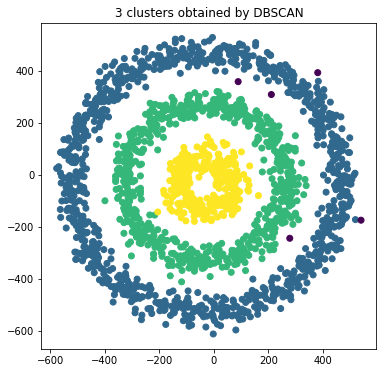

In [64]:
# Escribe tu código aquí:

# usamos DBSCAN para encontrar clusters
dbscan_opt = DBSCAN(eps=50,min_samples=10)

dbscan_opt.fit(df)

y_pred = dbscan_opt.labels_

# hallamos el número de clusters encontrados
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)

# visualizamos los resultados de DBSCAN
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], c=y_pred)

plt.title("%d clusters obtained by DBSCAN"%n_clusters)

plt.show()